In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('/content/smsspamcollection (1).tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [15]:
df.shape

(5572, 4)

Data cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [17]:
df1 = df.drop(columns=['length','punct'])

In [18]:
df1.sample(5)

,label,message
5179,ham,"Hi hope u r both ok, he said he would text and..."
4943,ham,"I'm eatin now lor, but goin back to work soon...."
5315,ham,Hahaha..use your brain dear
3873,ham,I am joining today formally.Pls keep praying.w...
2462,ham,Anything lar...


In [19]:
# label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
encoder.fit_transform(df1['label'])  # fit- it learns from data, transform-

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
df1['label'] = encoder.fit_transform(df1['label'])

In [22]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# cheking missing valus
df1.isnull().sum()

,0
label,0
message,0


In [24]:
# check the duplicate values
df1.duplicated().sum()

np.int64(403)

In [25]:
# removing duplicates
df1.drop_duplicates(keep='first', inplace=True)

In [26]:
df1.duplicated().sum()

np.int64(0)

In [27]:
df1.shape

(5169, 2)

EDA

In [28]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df1['label'].value_counts()

,count
label,
0,4516
1,653


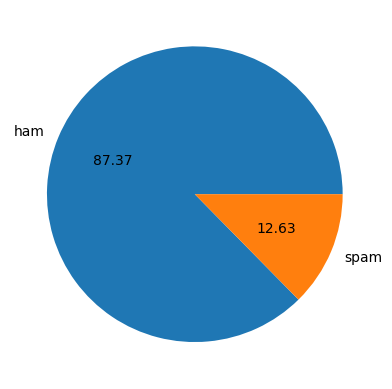

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df1['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
df1['message'].apply(len)

,message
0,111
1,29
2,155
3,49
4,61
...,...
5567,160
5568,36
5569,57
5570,125


In [33]:
df1['num_characers'] = df1['message'].apply(len)

In [34]:
df1.head()

,label,message,num_characers
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
nltk.download('punkt_tab')
# no. of words
df1['message'].apply(lambda x:nltk.word_tokenize(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [36]:
df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

,message
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [37]:
df1['num_words'] = df1['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df1.head()

,label,message,num_characers,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
# tokenize sentence
df1['message'].apply(lambda x:nltk.sent_tokenize(x))

,message
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5567,[This is the 2nd time we have tried 2 contact ...
5568,[Will ü b going to esplanade fr home?]
5569,"[Pity, * was in mood for that., So...any other..."
5570,[The guy did some bitching but I acted like i'...


In [40]:
df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

,message
0,2
1,2
2,2
3,1
4,1
...,...
5567,4
5568,1
5569,2
5570,1


In [41]:
df1['num_sentences'] = df1['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [42]:
df1.head()

,label,message,num_characers,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df1[['num_characers','num_words','num_sentences']].describe()

,num_characers,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344941,18.593538,1.974076
std,58.439256,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
# ham
df1[df1['label']==0][['num_characers','num_words','num_sentences']].describe()

,num_characers,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.906333,17.267715,1.827724
std,56.717234,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
# spam
df1[df1['label']==1][['num_characers','num_words','num_sentences']].describe()

,num_characers,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [46]:
import seaborn as sns

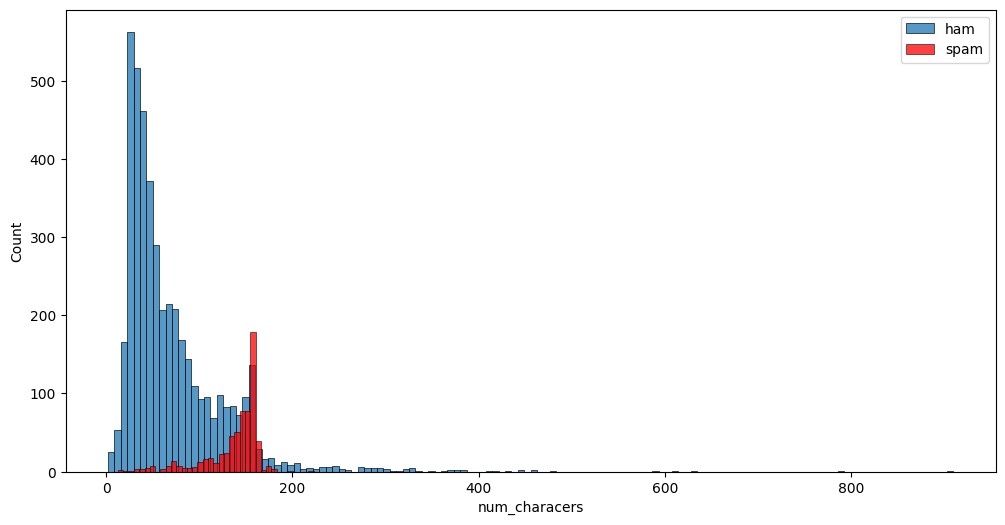

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_characers'])
sns.histplot(df1[df1['label']==1]['num_characers'],color='red')
plt.legend(['ham','spam'])
plt.show()

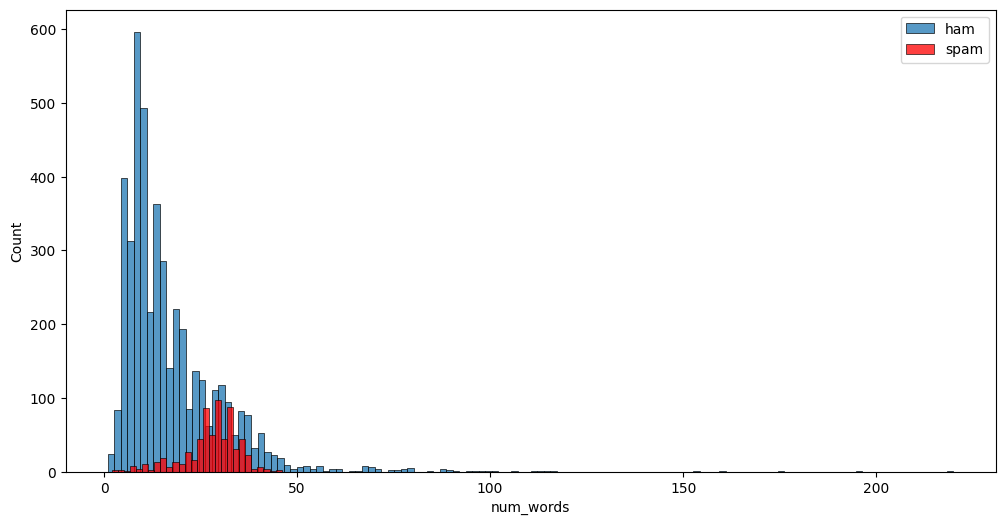

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_words'])
sns.histplot(df1[df1['label']==1]['num_words'],color='red')
plt.legend(['ham','spam'])
plt.show()

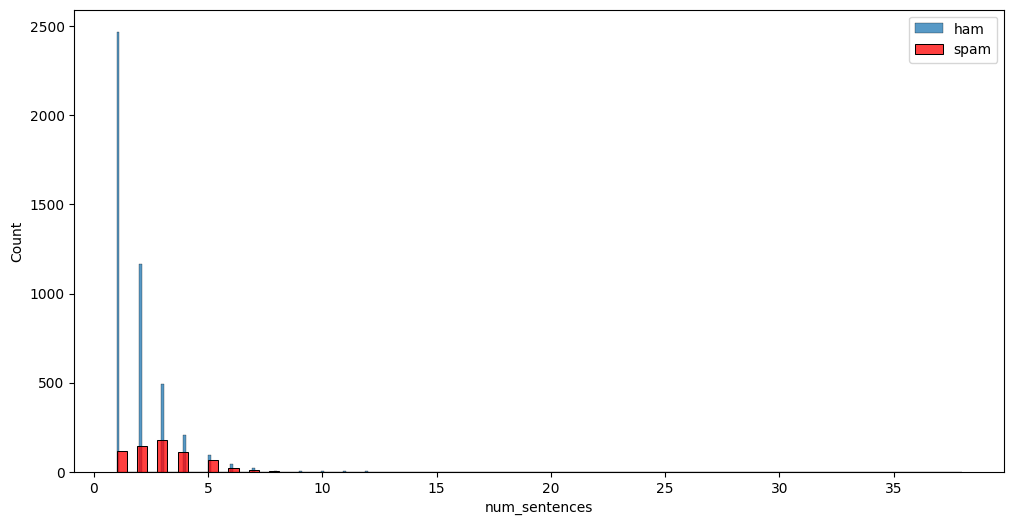

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_sentences'])
sns.histplot(df1[df1['label']==1]['num_sentences'],color='red')
plt.legend(['ham','spam'])

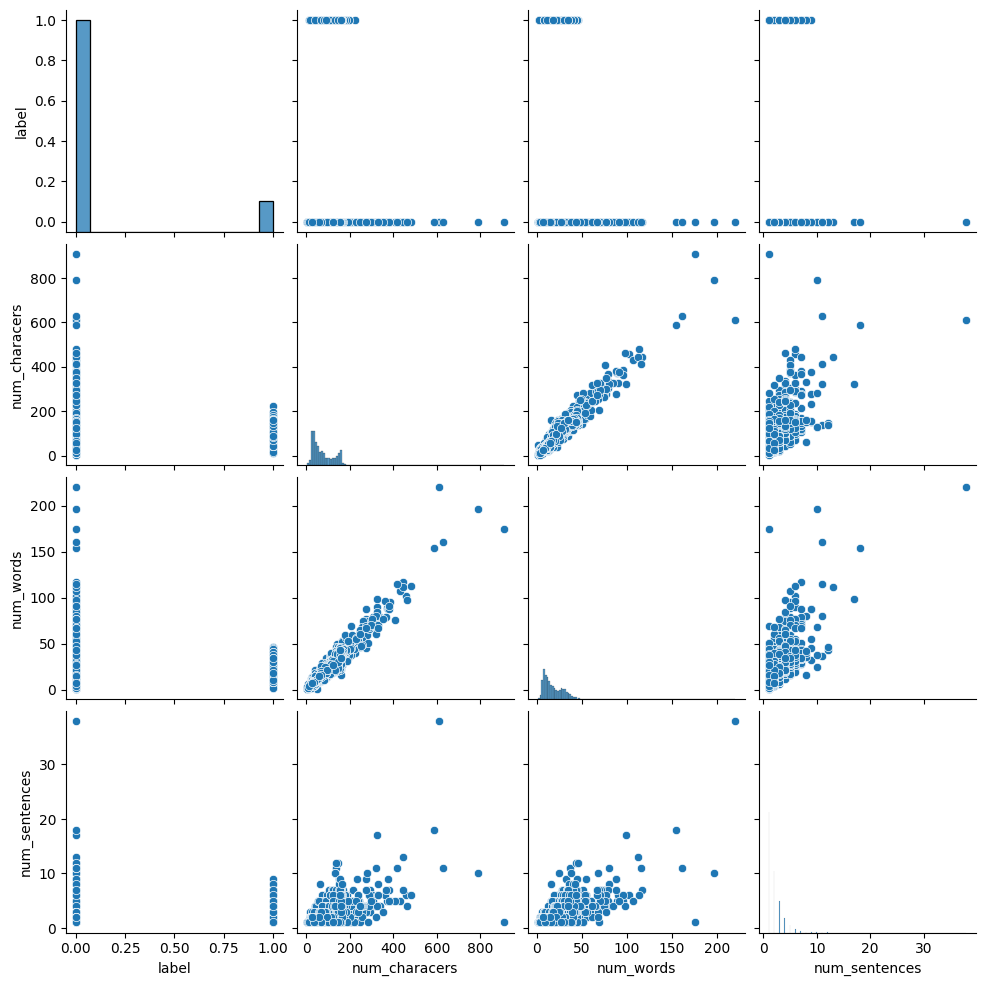

In [50]:
import seaborn as sns

# finding corelation
sns.pairplot(df1)

In [51]:
df2 = df1.drop(columns=['message'])
df2

,label,num_characers,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,160,35,4
5568,0,36,9,1
5569,0,57,15,2
5570,0,125,27,1


In [52]:
df2.corr()

,label,num_characers,num_words,num_sentences
label,1.000000,0.379777,0.260168,0.263826
num_characers,0.379777,1.000000,0.966002,0.622566
num_words,0.260168,0.966002,1.000000,0.679142
num_sentences,0.263826,0.622566,0.679142,1.000000


<Axes: >

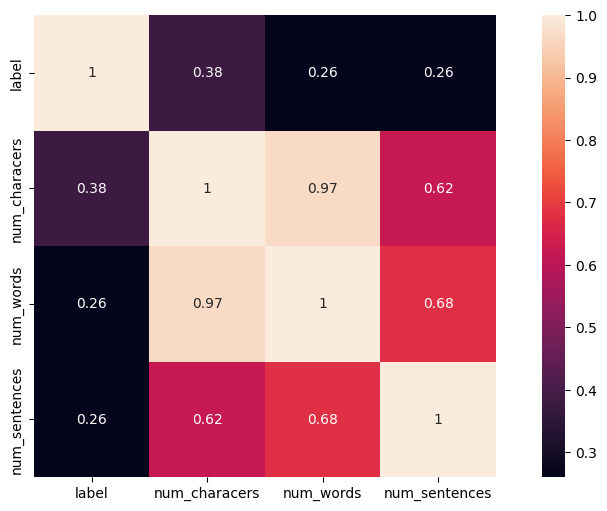

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(),annot=True,square=True)

Data Preprocessing

In [54]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [57]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [58]:
df1['message'].apply(transform_text)

,message
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,ü b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [59]:
df1['transform_message']= df1['message'].apply(transform_text)

In [60]:
df1.head()

,label,message,num_characers,num_words,num_sentences,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
# word cloud for ham

!pip install wordcloud

In [62]:
from wordcloud import WordCloud

In [63]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [64]:
spam_wc = wc.generate(df1[df1['label']==1]['transform_message'].str.cat(sep=" "))

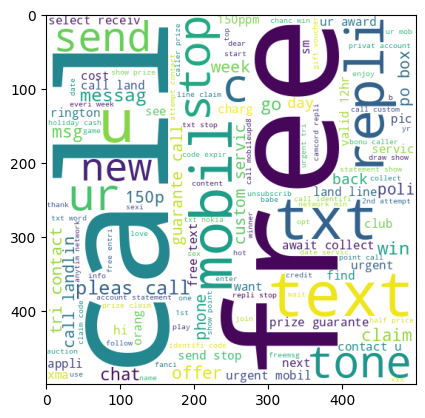

In [65]:
plt.imshow(spam_wc)

In [66]:
ham_wc = wc.generate(df1[df1['label']==0]['transform_message'].str.cat(sep=" "))

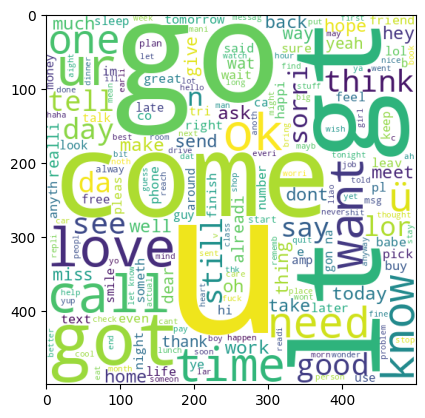

In [67]:
plt.imshow(ham_wc)

In [68]:
df1[df1['label']==1]['transform_message'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [69]:
spam_corpus = []
for msg in df1[df1['label']==1]['transform_message'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [70]:
len(spam_corpus)

9982

In [71]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 61,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [72]:
spam_corpus = []
for msg in df1[df1['label']==1]['transform_message'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [73]:
len(spam_corpus)

9982

In [74]:
print(spam_corpus[:20])

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt']


In [75]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 120),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 108),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [76]:
# Adding in dataframe
from collections import Counter
df3 = pd.DataFrame(Counter(spam_corpus).most_common(30))
df3

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


In [77]:
df3 = df3.rename(columns={0:'Word', 1:'Count'})
df3

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


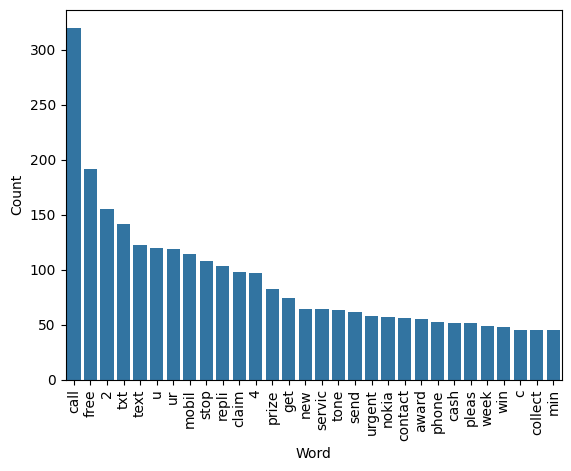

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Word',y='Count',data=df3)
plt.xticks(rotation='vertical')
plt.show()

In [79]:
ham_corpus = []
for msg in df1[df1['label']==0]['transform_message'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [80]:
len(ham_corpus)

35939

In [81]:
from collections import Counter
Counter(ham_corpus)

Counter({'go': 407,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 121,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 239,
         'amor': 1,
         'wat': 108,
         'ok': 218,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 897,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 58,
         'alreadi': 90,
         'nah': 10,
         'think': 150,
         'goe': 26,
         'usf': 11,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 78,
         'brother': 18,
         'like': 236,
         'speak': 25,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [82]:
from collections import Counter
df4 = pd.DataFrame(Counter(ham_corpus).most_common(30))
df4 = df4.rename(columns={0:'Word', 1:'Count'})
df4


,Word,Count
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


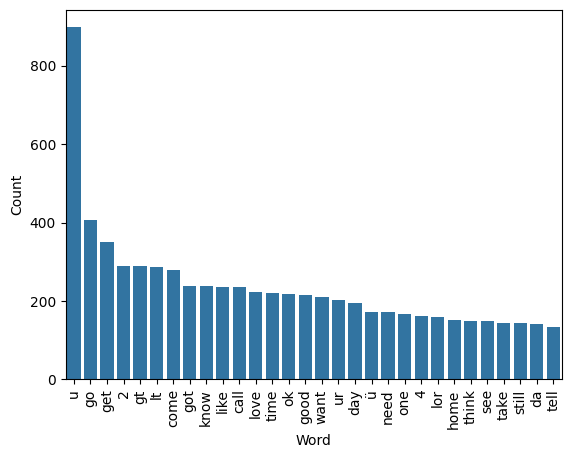

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Word',y='Count',data=df4)
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [84]:
df1.head()

,label,message,num_characers,num_words,num_sentences,transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [86]:
x = cv.fit_transform(df1['transform_message']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [87]:
x.shape

(5169, 6782)

In [88]:
y = df1['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
# Train-test Splitting
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [97]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [98]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [100]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[794 114]
 [ 21 105]]
0.4794520547945205


In [102]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9680851063829787
[[891  17]
 [ 16 110]]
0.8661417322834646


In [104]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.965183752417795
[[903   5]
 [ 31  95]]
0.95
